In [4]:
import igraph
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pynauty
from sympy.combinatorics import Permutation, PermutationGroup

from qlinks.lattice.square_lattice import SquareLattice
from qlinks.visualizer.basis import BasisVisualizer
from utils import format_custom_index, setup_model, setup_igraph

np.set_printoptions(threshold=np.inf)
pd.set_option("display.max_rows", None)

# QLM / QDM in Momemtum Space

In [23]:
coup_j, coup_rk = (1, -0.7)
momenta = (0, 0)
basis, model = setup_model(
    "qdm", lattice_shape=(4, 4), coup_j=coup_j, coup_rk=coup_rk, momenta=momenta
)
evals, evecs = np.linalg.eigh(model.hamiltonian.toarray())

2024-06-30 17:58:43 [constraint_programming.py] INFO: CpSolverResponse summary:
status: OPTIMAL
objective: 0
best_bound: 0
integers: 32
booleans: 32
conflicts: 37
branches: 2049
propagations: 9234
integer_propagations: 10892
restarts: 575
lp_iterations: 790
walltime: 0.055646
usertime: 0.055646
deterministic_time: 0.00471525
gap_integral: 0
solution_fingerprint: 0x932947a4f9f63e5f

2024-06-30 17:58:43 [constraint_programming.py] INFO: Found 132 optimal solutions.


In [24]:
model.translation._df

,1142025915,1143328443,1146285243,1147587771,1147913403,1147914675,1152797883,1152818235,1153123515,1153124787,...,3994147377,3994152465,3995438355,3995454993,3998406705,3998411793,3999714321,4000039953,4004924433,4005250065
"(0, 0)",1142025915,1143328443,1146285243,1147587771,1147913403,1147914675,1152797883,1152818235,1153123515,1153124787,...,3994147377,3994152465,3995438355,3995454993,3998406705,3998411793,3999714321,4000039953,4004924433,4005250065
"(0, 1)",300858180,634305348,1391246148,1724693316,1808055108,1808380740,3058481988,3063692100,3141843780,3142169412,...,299512302,300814830,630002670,634261998,1389900270,1391202798,1724649966,1808011758,3058438638,3141800430
"(0, 2)",4005250065,3468379173,3971695698,3434824806,3300607083,3383968875,1287341238,2621129910,1153123515,1236485307,...,3660705297,3994152465,2366893605,3457281573,3627150930,3960598098,3423727206,3289509483,1276243638,1142025915
"(0, 3)",3141800430,3141805518,3141817068,3141822156,3141823428,3007605705,3141842508,994358940,3141843780,3007626057,...,837685722,300814830,334374285,300819918,837702360,300831468,300836556,300837828,300856908,300858180
"(1, 0)",289717230,294927342,290042862,295252974,296555502,296560590,299512302,299528940,300814830,300819918,...,3141823428,3141843780,3147052620,3147053892,3142149060,3142169412,3147379524,3148682052,3151638852,3152941380
"(1, 1)",1153166865,2486955537,1236528657,2570317329,2903764497,2905067025,3660705297,3664964625,3994152465,3995454993,...,1147913403,1153123515,2486586555,2486912187,1231275195,1236485307,2570273979,2903721147,3660661947,3994109115
"(1, 2)",3152941380,1005457812,3018723657,871240089,334369197,667816365,837685722,1928073690,300814830,634261998,...,1808055108,3141843780,910998420,994360212,1673837385,3007626057,860142489,323271597,826588122,289717230
"(1, 3)",3994109115,3994129467,3994110387,3994130739,3994135827,3457264935,3994147377,3960593010,3994152465,3457281573,...,3300607083,1153123515,1287361590,1153143867,3300608355,1153124787,1153145139,1153150227,1153161777,1153166865
"(2, 0)",1142025915,1146285243,1143328443,1147587771,1152797883,1152818235,1147913403,1147914675,1153123515,1153143867,...,3994135827,3994152465,3998406705,3998411793,3995438355,3995454993,3999714321,4004924433,4000039953,4005250065
"(2, 1)",300858180,1391246148,634305348,1724693316,3058481988,3063692100,1808055108,1808380740,3141843780,3147053892,...,296555502,300814830,1389900270,1391202798,630002670,634261998,1724649966,3058438638,1808011758,3141800430


In [26]:
model.translation.representatives.unique()

array([289717230, 290042862, 295252974, 296555502, 296560590, 300814830,
       300819918, 300836556, 300837828, 334374285, 630007758, 634267086,
       634278636, 634283724, 323597229, 328481709, 328807341, 333066669,
       330109869, 330114957, 663562125, 865678233])

In [20]:
df = model.translation.representative_basis(momenta).dataframe
df.index = format_custom_index(df.index)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
(0) 289717230,0,0,0,1,0,0,0,1,0,1,...,1,1,1,1,1,0,1,1,1,0
(1) 290042862,0,0,0,1,0,0,0,1,0,1,...,1,1,1,1,1,0,1,1,1,0
(2) 295252974,0,0,0,1,0,0,0,1,1,0,...,1,1,1,1,1,0,1,1,1,0
(3) 296555502,0,0,0,1,0,0,0,1,1,0,...,1,1,1,1,1,0,1,1,1,0
(4) 296560590,0,0,0,1,0,0,0,1,1,0,...,1,1,1,1,0,0,1,1,1,0
(5) 300814830,0,0,0,1,0,0,0,1,1,1,...,0,1,1,1,1,0,1,1,1,0
(6) 300819918,0,0,0,1,0,0,0,1,1,1,...,0,1,1,1,0,0,1,1,1,0
(7) 300836556,0,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,1,0,0
(8) 300837828,0,0,0,1,0,0,0,1,1,1,...,1,1,1,1,0,0,0,1,0,0
(9) 323597229,0,0,0,1,0,0,1,1,0,1,...,1,1,1,0,1,0,1,1,0,1


In [19]:
evecs_df = pd.DataFrame.from_dict(
    {
        "eval": evals,
        "kin": np.real_if_close([(evec.T @ model.kinetic_term @ evec).item() for evec in evecs.T]),
        "pot": np.real_if_close(
            [(evec.T @ model.potential_term @ evec).item() for evec in evecs.T]
        ),
    }
)
evecs_df[evecs_df["kin"].abs() < 1e-12]

,eval,kin,pot
7,-4.2,-1.241701e-29,6.0
12,-2.8,-1.878816e-30,4.0
13,-2.8,-2.726223e-30,4.0
14,-2.8,-1.586966e-31,4.0


In [14]:
g = nx.from_scipy_sparse_array(model.kinetic_term)
ig = igraph.Graph.from_networkx(g)

ntg = pynauty.Graph(
    ig.vcount(),
    adjacency_dict=nx.to_dict_of_lists(g),
    # vertex_coloring=[{1, 2, 4, 7, 8, 11, 13, 14}, {3, 6, 9, 12}, {0, 5, 10, 15}]
)
aut_gp = pynauty.autgrp(ntg)[0]

perm_gp = PermutationGroup([Permutation(p) for p in aut_gp])
print(perm_gp.orbits())

[{0, 3, 4}, {1, 2}]


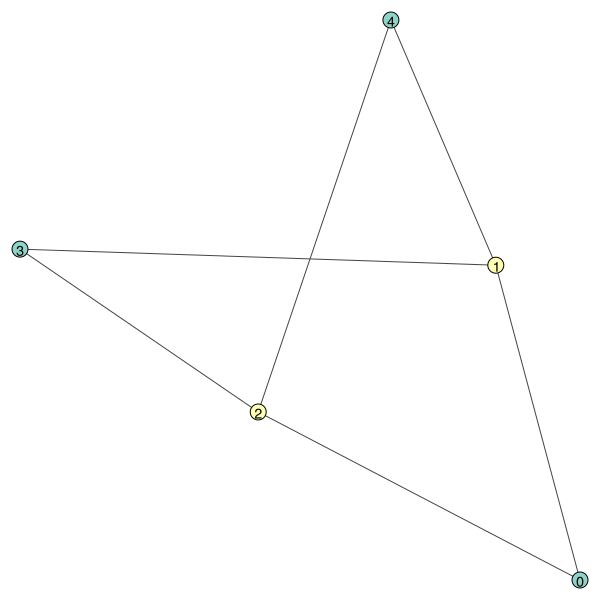

In [15]:
g = nx.from_scipy_sparse_array(-model.kinetic_term)

highlight = [
    # np.where(np.abs(np.real_if_close(evecs[:, 1])) > 0.2)[0],
    # np.where(np.abs(np.real_if_close(evecs[:, 2])) > 0.2)[0],
]
# highlight = list(aut.degree_partition.values())
highlight = perm_gp.orbits()
# highlight = list(aut.bipartition.values())

# highlight_color = list(mcolors.TABLEAU_COLORS.values())
# highlight_color = list(mcolors.CSS4_COLORS.values())
cmap = plt.get_cmap('Set3')
highlight_color = [mcolors.to_hex(cmap(i)) for i in range(cmap.N)]
cmap = plt.get_cmap('Set2')
highlight_color += [mcolors.to_hex(cmap(i)) for i in range(cmap.N)]

ig = setup_igraph(g, highlight, highlight_color)

# sub_ig = ig.induced_subgraph(np.where(np.diag(two_steps_mat) == 4)[0])
# fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")
igraph.plot(
    ig,
    layout=ig.layout_kamada_kawai(),
    vertex_size=16,
    # vertex_color="whitesmoke",
    # target=ax
    # inline=True
)

array([1, 2])

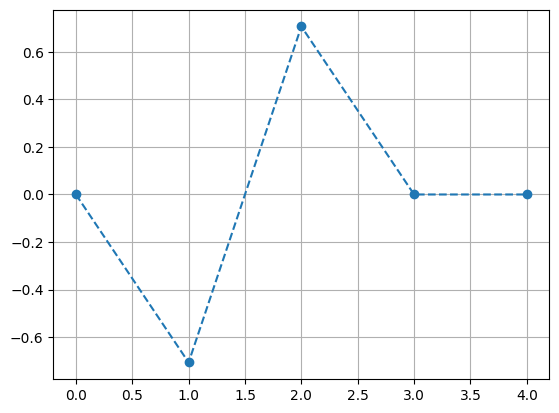

In [17]:
i = 2
plt.plot(np.real_if_close(evecs[:, i]), linestyle="--", marker="o")
plt.grid()
np.where(np.abs(np.real_if_close(evecs[:, i])) > 0.2)[0]

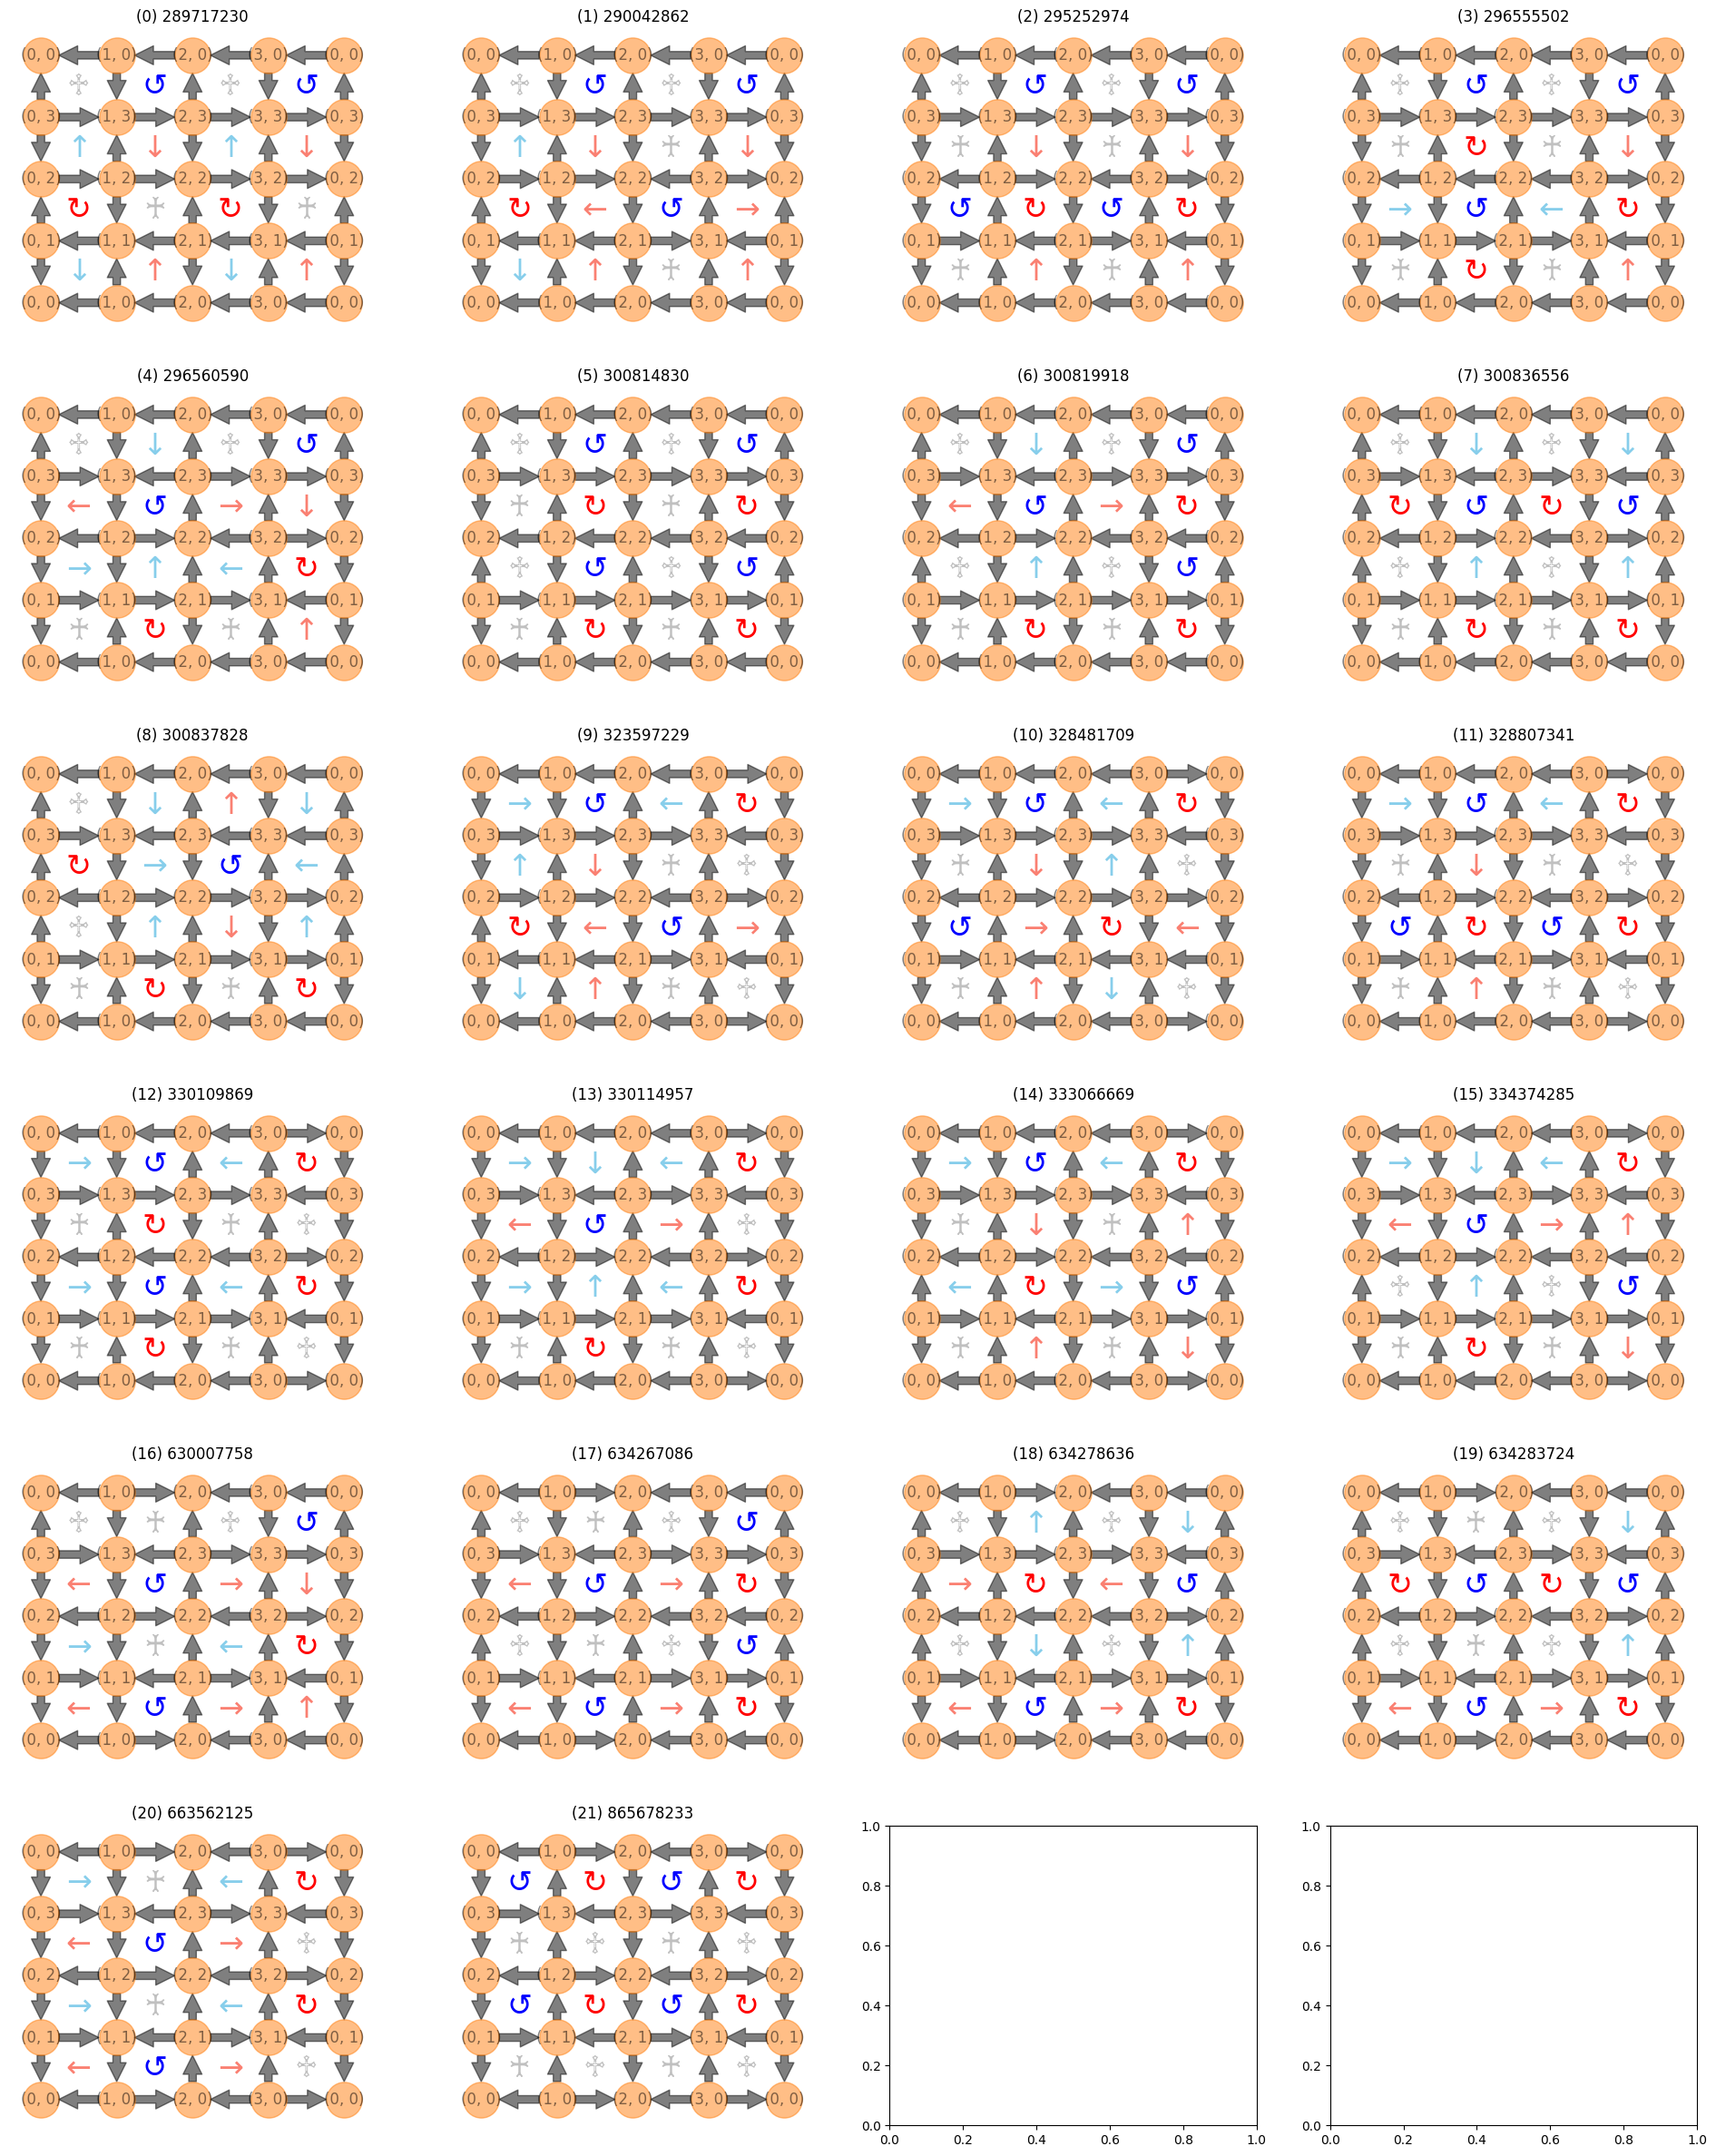

In [22]:
fig, axes = plt.subplots(6, 4, figsize=(24, 30), facecolor="white")
ax = axes.flatten()

for i in range(df.shape[0]):
    g = BasisVisualizer(SquareLattice(*model.shape, df.iloc[i, :]))
    g.plot(show=False, ax=ax[i], node_size=800)
    ax[i].set_title(f"{df.index[i]}")